# 线性规划的问题

1. 假设是一条直线，是否合理；
2. 假设误差满足正态分布，是否合理；
3. 使用线性回归的分类的依据在哪里；（预测，分类）
    


# 线性回归的分类的确定与改进

- 新的算法：
    - 专门用来分类的线性回归：逻辑回归
    

## 鸢尾花四维数据分类

In [22]:
%matplotlib inline

import sklearn.datasets as ds
import numpy as np
import numpy.linalg as la

data, target = ds.load_iris( return_X_y=True)
# 1. 训练数据样本：0：50(0)/ 50: 100(1)
# 准备数据X + 1，Y

X =  np.zeros(shape=(100, data.shape[1] + 1 ) ,dtype=np.float)
X[0:50, 0:4] = data[50:100,:]
X[50:100, 0:4] = data[100:150,:]

X[:, 4] =1

Y = target[0:100]
Y = Y.reshape(100, 1)

# 2. 利用上面100个数据（0，1）训练出一条直线（X^T X ）可逆，直线是否对鸢尾花的种类可分。

W =  np.matmul(
            np.matmul(
                la.inv( 
                    np.matmul(
                        X.T, 
                        X) 
                ),
                X.T),
            Y)

# print(W)
# 3. 预测数据

r1 =  np.matmul(X[0:50], W)
r2 =  np.matmul(X[50:100], W)
# 训练出来的的直线，具备分类效果
# 根据已知，直到前面50个都是A类，标签是0，统计<0.5的个数，都是A类
# 统计一个数组大于a的数量，小于b的数量

print((r1<0.5).sum())
print((r1<0.5).sum())

# 线性回归具备分类效果
# 0: 50,100-150

48
48


- $W={(X^TX)}^{-1}X^TY$

问题：
    - 这个分类的依据是什么？
    

### 观察鸢尾花数据

# 误差的正态分布假设的确定与改进

- 使用最小二乘法：
    - 满足条件：$X^TX$可逆

- $X^TX$不可逆

- $W={(X^TX + \lambda I)}^{-1}X^TY$  : 只要$\lambda$取值合适，可以肯定可逆。
    - Ridge回归：岭回归
    
    - 在推导过程中，再改变计算方式：LASSO回归。

- $W={(X^TWX )}^{-1}X^TY$；只要$W$取值合适，可以肯定可逆。
    - 加权回归；（Local Weighted Linear Regression）

- LASSO回归


# 总结回归的问题

1.  线性回归作为分类，使用0.5划分分类标准的数学理论依据；
    - 逻辑回归
    

2. 线性回归，最下二乘法求解需要满足一个条件：
    - $X^TX$可逆
    
    - 使用$\lambda I$ 
    - 岭回归 -> LASSO回归
    

3. 损失函数最小
    - 似然函数的最大->损失最小。


# 局部加权回归

- 解决欠拟合。
    - 损失采用标准高斯分布（正态分布），得到误差不是最理想。
    - 损失函数趋近0。

## 真实值$Y$与训练后的曲线的计算值$\bar{Y}$

- 相关系数
- $R^2$

### 相关系数
    - 方差
    
- $r = \dfrac{Cov(X,Y)}{\sqrt{ Var(X) Var(Y) }}$

In [2]:
import numpy as np
import numpy.random as rd

x = rd.uniform(0, 1, 5)
y = rd.uniform(0, 1, 5)

r = np.corrcoef(x, y)
print(r)


[[1.         0.57430407]
 [0.57430407 1.        ]]


- 矩阵的每个值的函数

```python

[
   x与x的相关性1        x与y的相关性0-1   
   y与x的相关性0-1     y与y的相关性1
]

```

- 误差最小与相关性
    - 绝对值0
    - 相关性相对度量。

## 测试相关系数
    - 鸢尾花
    - 身高与年龄
    - 模拟的数据（使用数据函数 + 模拟误差生成的数据）
    
- 鸢尾花的训练数据 = 手工算法

1. 手工实现


[[1.69532264]]
[3.00774324]
0.9731300889856915
[[1.         0.98647356]
 [0.98647356 1.        ]]


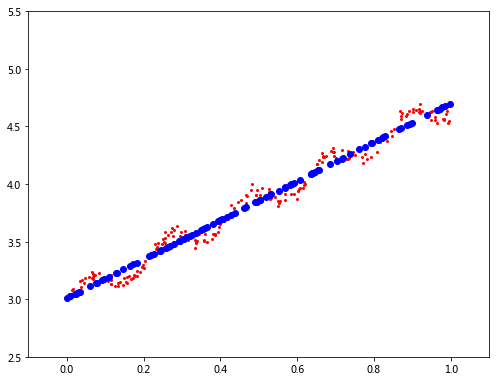

In [23]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rd
import numpy.linalg as la
from sklearn.linear_model import LinearRegression     # 线性回归的封装

# 加载数据
data = np.loadtxt('ex0.txt')
# 格式化数据
X = data[:, 1]
Y = data[:, 2]

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

# 计算线性回归的 斜率+ 截距
regression = LinearRegression()
regression.fit(X,Y)
# 打印相关系数
print(regression.coef_)
print(regression.intercept_)
print(regression.score(X, Y))
print(np.corrcoef(regression.predict(X).T , Y.T))

# 可视化出来
figure = plt.figure('线性回归可视化', figsize=(8, 6))
# 图与坐标系
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(2.5, 5.5)
# 绘制训练样本点
ax.scatter(data[:, 1], data[:, 2], s=16, marker='.', c='r')
# 绘制直线
x_ = rd.uniform(0, 1,(100,1))
y_ = regression.predict(x_)

ax.scatter(x_, y_, c='b')

plt.show()



# 局部加权的算法规则：

- 备注
    - $J(W) = \dfrac{1}{2} \sum \limits _{i=1} ^ m (x_iW - y_i)^2$
    - $J(W) = \dfrac{1}{2} \sum \limits _{i=1} ^ m w_i(x_iW - y_i)^2$
    
    - $W=(X^T\bar{W}X)^{-1}X^T\bar{W}Y$     
    
    -$w^{(i)}=exp(\dfrac{(x^{(i)}-x)^2}{-2{\sigma}^2})$

$\bar{W}$ 其中：对角线非0，非对角线全部是0，对角线上取值：$w_{ii} = 正态分布的根据x与y误差取概率值$

1. 已知一个样本集合X，Y

2. 预测值一个x_, 根据x_，计算【局部加权矩阵】
    (x_ - xi)的平方，求正态分布的结果


- 局部加权的实现代码



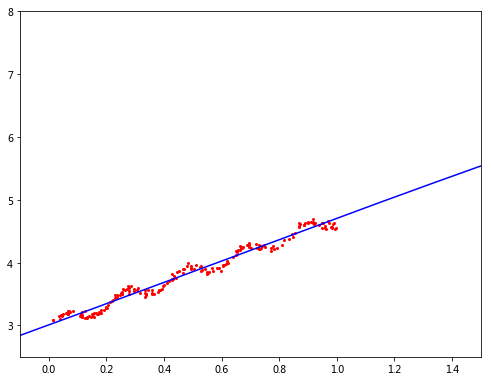

In [77]:
% matplotlib  inline
import numpy as np
import numpy.linalg as la
import numpy.random as rd

sigma = 0.5

def  normal(x_, xi):
    # 计算x_与xi的差
    diff = x_ - xi
    # 求平方
    sq= np.matmul(diff, diff.T)/(-2.0 * sigma**2)
    # 出-1与方差=1
    result = np.exp(sq)
    return result
    

def loacal_wieght(x_):
    # 已知样本X，Y
    # 加载已知样本
    data = np.loadtxt('ex0.txt')
    # 格式化数据
    X_DATA = data[:, 1]
    Y_DATA = data[:, 2]
    # 给X加上列，这个列的值全部是1
    X = np.zeros((X_DATA.shape[0], 2) ,dtype=np.float)
    X[:, 0] = X_DATA
    X[:, 1] = 1
    
    Y = Y_DATA.reshape((Y_DATA.shape[0], 1))
    # 根据x_   X, Y计算局部加权矩阵
    W_ = np.zeros((X.shape[0],  X.shape[0]), dtype=np.float)
    for i in range(X.shape[0]):
        W_[i,i] = normal(x_, X[i, :])
    
    # 根据加权计算出W
    W =np.matmul(np.matmul(np.matmul(la.inv(np.matmul(np.matmul(X.T, W_),X)), X.T),W_),Y)
    # 根据W计算y
    y_ = np.matmul(x_,W)
    
    return y_

% matplotlib inline
import matplotlib.pyplot as plt

# 可视化工作
figure = plt.figure('局部加权回归', figsize=(8, 6))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])
ax.set_xlim(-0.1, 1.5)
ax.set_ylim(2.5, 8)
# 散点图
data = np.loadtxt('ex0.txt')
ax.scatter( data[:, 1], data[:, 2] , s=4, c='r', marker='o' )
# 虚拟x点，画出回归后的曲线。

num =1000
x_line = np.linspace(-0.1, 1.5, num)

# 构造测试样本
x_test = np.zeros((num, 2), dtype=np.float)
# x_test第一列设置x_line，第二列设置1
x_test[:,0] =x_line
x_test[:,1] = 1
# 计算x_test的预测值(循环计算每个值)
y_test = np.zeros((num, 1), dtype=np.float)
for idx in range(num): 
     y_test[idx] = loacal_wieght(x_test[idx, :])

# 绘制直线

ax.plot(x_line, y_test, color=(0, 0, 1, 1) )

plt.show()


$W=(X^T\bar{W}X)^{-1}X^T\bar{W}Y$     

线性回归实际是局部加权回归的一个特列
    - sigma >=1 实际上是线性回归（正态分布N(0，1)）

# Ridge回归

- 岭回归


- 任何形状的矩阵M
    - 可以分解：$M= U \Sigma V^T$
        - $\Sigma$ 对角矩阵
        - U与V是正交矩阵：$U^T U=I$

- 求解公式
- 从W回退损失函数，回退概率模型

$W=(X^TX)^{-1}X^TY$     

$W=V (\Sigma ^T \Sigma + \lambda  I )^{-1} \Sigma ^T U^TY$

只要保证$(\Sigma ^T \Sigma + \lambda  I ) $满足可逆，矩阵就有解。

$(\Sigma ^T \Sigma + \lambda  I ) $ 对接矩阵，可逆，只要对角线上都不为0,就可逆

$\Sigma ^T \Sigma   $ 这个矩阵，对角线上市某个值平方

- 只要$\lambda > 0$，则整个矩阵100%可逆。

- 岭回归算法：
- $W=(X^TX + \lambda I)^{-1}X^TY$   ，其中$\lambda > 0 $
    - 通过代码检验效果是可以
    - 通过数学的推导，来证明岭回归是可信：岭回归的数学本质

## 岭回归的代码实现

[[1.69530937]
 [3.00773468]]


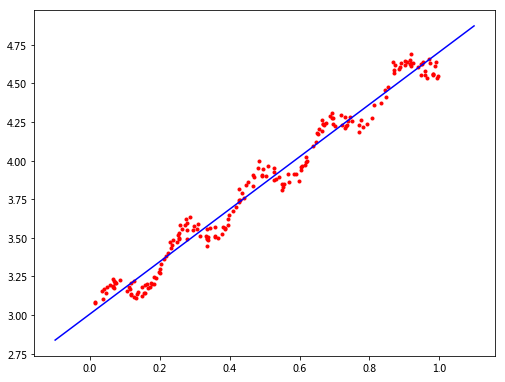

In [94]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la


# 加载数据
data = np.loadtxt('ex0.txt') 
X_DATA = data[:, 1]
Y_DATA = data[:, 2]

X = np.zeros((X_DATA.shape[0], 2), dtype=np.float)
X[:, 0] = X_DATA
X[:, 1] = 1

Y = Y_DATA.reshape(( Y_DATA.shape[0], 1))

# 计算W（假设参数lambda）
p_lambda = 0.001

S1 = np.matmul(X.T, X)
S2 = S1 + p_lambda * np.eye(X.shape[1])
S3 = la.inv(S2)
S4 = np.matmul(S3, X.T) 
W = np.matmul(S4, Y)
print(W)
# 预测
# 构建n个虚拟的样本，计算预测值
num =100
x_ = np.linspace(-0.1, 1.1 , num)

x_test = np.zeros((num, 2) , dtype=np.float)
x_test[:, 0] = x_
x_test[:, 1] = 1

y_test = np.matmul(x_test, W)
# 预测可视化

figure = plt.figure('岭回归', figsize=(8,6))
ax = figure.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(data[:, 1], data[:,2], s=9, c='r')
ax.plot(x_, y_test, color=(0,0,1,1))

plt.show()


## 使用sklearn实现岭回归

In [97]:
from  sklearn.linear_model import Ridge
import numpy as np

regression = Ridge(0.001, fit_intercept=True)

data = np.loadtxt('ex0.txt')

X_DATA = data[:, 1]
Y_DATA = data[:,2]

# 训练
X_DATA = X_DATA.reshape(-1, 1)  # -1表示人也行数
Y_DATA = Y_DATA.reshape(-1, 1)  # 任意的行数，1列

regression.fit(X_DATA, Y_DATA)

print(regression.coef_)
print(regression.intercept_)



[[1.69522337]]
[3.00779172]


# 岭回归的总结

- 线性回归
    1. 假设数据服从线性模型$Y=XW$
    2. 线性模型存在误差:$Y= XW +\epsilon$
    3. 假设误差满足正态分布：$\epsilon ~ N(\mu, \sigma) = N(0, 1)$
    4. 所有样本的误差概率：似然函数$L(W)$
    5. 对似然数求自然对数，推导求最大概率，转变成求最小值：方差公式：损失函数:$loss= \dfrac{1}{2} \sum _{i=1}^{n} (y_i - x_iW)^2$
    6. 求损失最小值：最下二乘法：$W= (X^TX)^{-1}XY$

- 岭回归
    - 从最小二乘法不可逆的情况的解决除法，发现岭回归的数学模型

- 岭回归模型
    - 假设数据服从线性模型$Y=XW$
    - 线性模型存在误差
    - 误差（误差的后验模型）：测量误差：$\epsilon$满足正态分布$N(0, \sigma)$，系数误差也存在，而且满足正态分布$N(0, \tau)$
    - 同样得到概率计算：概率似然函数$L(W)$
    - 概率最大，误差最小，求最大值（推导）
    - 最小值模型：损失函数 $\dfrac{1}{2} \sum \limits _{i=1}^n (y_i-x_iW)^2+ \lambda \sum \limits _{i=1}^n {w_i}^2$
    - $\lambda= \dfrac{1}{\tau ^2}$   
    - 一般$\lambda$必须取>0得数。

- 线性回归实岭回归的特例：权重系数是固定，没有误差（方差=0，$\lambda=0$）

- 共同
    - 线性回归：线性
    - 岭回归：线性
    - LASSO回归：线性

- 差异：
    - 线性回归：
        - y值存在误差，服从正态分布$N(0, \sigma)$
        - 权重系数$w_i$没有误差
        - 损失函数：$loss = \dfrac{1}{2} \sum (y_i - x_iW)^2$
        
    - 岭回归 = 线性回归 + 惩罚项（二范数）  
        - y值存在误差，服从正态分布$N(0, \sigma)$
        - 权重系数$w_i$服从$N(0, \tau ^2)$：正态分布
        - 损失函数：$loss = \dfrac{1}{2} \sum (y_i - x_iW)^2  + \dfrac{1}{\tau^2} \sum {w_i}^2$
    
    - LASSO回归= 线性回归 + 惩罚项（一范数）
        - y值存在误差，服从正态分布$N(0, \sigma)$
        - 权重系数$w_i$服从$L(0, \tau ^2)$：拉普拉斯分布
        - 损失函数：$loss = \dfrac{1}{2} \sum (y_i - x_iW)^2  + \dfrac{1}{\tau^2} \sum {|w_i|}$
        
        
    - 补充：0范数
$w_i, i=1,\dots, n$ 非0个数= 0范数
        